In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("marketing_campaign.csv", sep='\t')

Since in the documentation, we only have explanation for the first 10 variables, we drop others

In [3]:
df2 = df1.iloc[:,:10]     

In [34]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173
...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428


Now we identify the type of each variable.

ID is nominal.<br>
Year_Birth is ordinal.<br>
Education is nominal.<br>
Marital_Status is nominal.<br>
Income is numerical.<br>
Kidhome is numerical.<br>
Teenhome is numerical.<br>
Dt_Customer is ordinal.<br>
Recency is numerical.<br>
MintWine is numerical.<br>


In [5]:
df2.dtypes

ID                  int64
Year_Birth          int64
Education          object
Marital_Status     object
Income            float64
Kidhome             int64
Teenhome            int64
Dt_Customer        object
Recency             int64
MntWines            int64
dtype: object

#### Then, we deal with the missing values.<br>

In [6]:
pd.isnull(df2).mean()

ID                0.000000
Year_Birth        0.000000
Education         0.000000
Marital_Status    0.000000
Income            0.010714
Kidhome           0.000000
Teenhome          0.000000
Dt_Customer       0.000000
Recency           0.000000
MntWines          0.000000
dtype: float64

So, only Income contains missing values.<br>
For simplicity, we assume it to be missing completely at random. (We didn't do hypothesis test to test this since the main task of this project is clustering not missing type analysis). So, we just drop these.

In [7]:
df3 = df2[~pd.isnull(df2["Income"])]

#### Now, we do some type conversion and feature engineering

We will drop ID column, since it means nothing in clustering

We will convert Year_Birth to age and standardize it.

In [8]:
age = 2021 - df3["Year_Birth"]
std_age = (age - np.mean(age))/np.std(age)

We will do One-hot encoding on Education

In [9]:
df3["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [10]:
Graduation = (df3["Education"] == "Graduation").astype(int)
PhD = (df3["Education"] == "PhD").astype(int)
Master = (df3["Education"] == "Master").astype(int)
Cycle = (df3["Education"] == "2n Cycle").astype(int)
Basic = (df3["Education"] == "Bsic").astype(int)

We will do One-hot encoding on Marital status

In [11]:
df3["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [12]:
Married = (df3["Marital_Status"] == "Married").astype(int)
Together = (df3["Marital_Status"] == "Together").astype(int)
Single = (df3["Marital_Status"] == "Single").astype(int)
Divorced = (df3["Marital_Status"] == "Divorced").astype(int)
Widow =  (df3["Marital_Status"] == "Widow").astype(int)
Others = ((df3["Marital_Status"] == "Alone")|(df3["Marital_Status"] == "Absurd")|(df3["Marital_Status"] == "YOLO")).astype(int)

We standardize income, kids and teens

In [13]:
std_income = (df3["Income"] - np.mean(df3["Income"]))/np.std(df3["Income"])

In [14]:
std_kid = (df3["Kidhome"] - np.mean(df3["Kidhome"]))/np.std(df3["Kidhome"])

In [15]:
std_teen = (df3["Teenhome"] - np.mean(df3["Teenhome"]))/np.std(df3["Teenhome"])

For Dt_Customer, we first find the first enrolled customer and calculate the day difference between others and the first enrolled customer. We standarize it.

In [16]:
min_date = min(df3["Dt_Customer"].apply(lambda x: pd.to_datetime(x)))

In [17]:
date1 = df3["Dt_Customer"].apply(lambda x: pd.to_datetime(x))

In [18]:
day_diff = (date1 - min_date).astype(str).apply(lambda x: x.split()[0]).astype(int)

In [19]:
std_day_diff = (day_diff - np.mean(day_diff))/np.std(day_diff)

We standardize Recency

In [20]:
std_recency = (df3["Recency"] - np.mean(df3["Recency"]))/np.std(df3["Recency"])

In [21]:
std_mntwines = (df3["MntWines"] - np.mean(df3["MntWines"]))/np.std(df3["MntWines"])

Output df

In [22]:
df4 = pd.DataFrame({"Age":std_age, "Income":std_income, "MntWines":std_mntwines, "Kids":std_kid, "Teens":std_teen, "Enroll_age":std_day_diff, "Recency":std_recency, "Graduation":Graduation, "PhD":PhD, "Master":Master, "Cycle":Cycle, "Basic":Basic, "Married":Married, "Together":Together, "Single":Single, "Divorced":Divorced, "Widow":Widow, "Others":Others})

In [23]:
df5 = df4.reset_index(drop = True)

In [24]:
df5

,Age,Income,MntWines,Kids,Teens,Enroll_age,Recency,Graduation,PhD,Master,Cycle,Basic,Married,Together,Single,Divorced,Widow,Others
0,0.986443,0.234063,0.978226,-0.823039,-0.928972,-1.974875,0.310532,1,0,0,0,0,0,0,1,0,0,0
1,1.236801,-0.234559,-0.872024,1.039938,0.909066,1.665141,-0.380509,1,0,0,0,0,0,0,1,0,0,0
2,0.318822,0.769478,0.358511,-0.823039,-0.928972,0.172132,-0.795134,1,0,0,0,0,0,1,0,0,0,0
3,-1.266777,-1.017239,-0.872024,1.039938,-0.928972,1.923298,-0.795134,1,0,0,0,0,0,1,0,0,0,0
4,-1.016420,0.240221,-0.391671,1.039938,-0.928972,0.821827,1.554407,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.151917,0.356642,1.197646,-0.823039,0.909066,-0.124749,-0.104093,1,0,0,0,0,1,0,0,0,0,0
2212,1.904422,0.467539,0.299208,2.902916,0.909066,1.940508,0.241428,0,1,0,0,0,0,1,0,0,0,0
2213,-1.016420,0.188091,1.787710,-0.823039,-0.928972,0.847643,1.450751,1,0,0,0,0,0,0,0,1,0,0
2214,1.069896,0.675388,0.364441,-0.823039,0.909066,0.843341,-1.417072,0,0,1,0,0,0,1,0,0,0,0


In [25]:
df5.to_csv("cleaned_data.csv")

In [26]:
# drop categorical columns
df6 = df5.drop(['Graduation','PhD','Master','Cycle','Basic','Married','Together','Single','Divorced','Widow','Others'], axis=1)

In [37]:
#create new columns by using formula
df6['MntWines/Income'] = df3['MntWines'] / df3['Income']

In [38]:
#drop Income and MntWines columns
df7 = df6.drop(["Income","MntWines"],axis=1)

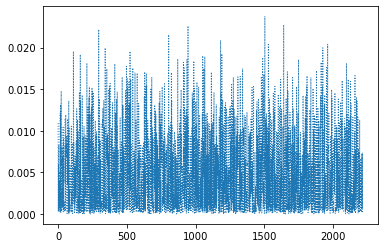

In [39]:
#plot the Mntwines/Income
plt.plot(np.arange(2216),df7['MntWines/Income'],ls = 'dotted',lw=1)

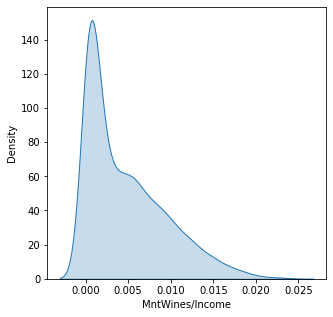

In [40]:
#density graph of the Mines/Income
plt.figure(figsize = (5,5))
sb.kdeplot(df7['MntWines/Income'] , fill = True)
plt.show()

In [36]:
df7

,Age,Kids,Teens,Enroll_age,Recency,MntWines/Income
0,0.986443,-0.823039,-0.928972,-1.974875,0.310532,0.010922
1,1.236801,1.039938,0.909066,1.665141,-0.380509,0.000237
2,0.318822,-0.823039,-0.928972,0.172132,-0.795134,0.005949
3,-1.266777,1.039938,-0.928972,1.923298,-0.795134,0.000413
4,-1.016420,1.039938,-0.928972,0.821827,1.554407,0.002968
...,...,...,...,...,...,...
2211,0.151917,-0.823039,0.909066,-0.124749,-0.104093,0.005876
2212,1.904422,2.902916,0.909066,1.940508,0.241428,0.000604
2213,-1.016420,-0.823039,-0.928972,0.847643,1.450751,0.007368
2214,1.069896,-0.823039,0.909066,0.843341,-1.417072,0.002262
